# Лабораторная работа 1
# Решение систем дифференциальных уравнений
Выполнил: Гапанович А. В. (4 группа)



Дана следующая система дифференциальных уравнений:
$${\begin{equation*}
 \begin{cases}
   \frac{dy}{dt}=-y+0.999z\\
   \frac{dz}{dt}=-0.001z
 \end{cases}
 \end{equation*}}$$




с начальными условиями: $${y(0) = 2, z(0) = 1.}$$


# 1. Аналитическое решение и число жесткости.

Решим систему с помощью программного пакета Wolfram Mathemathica:

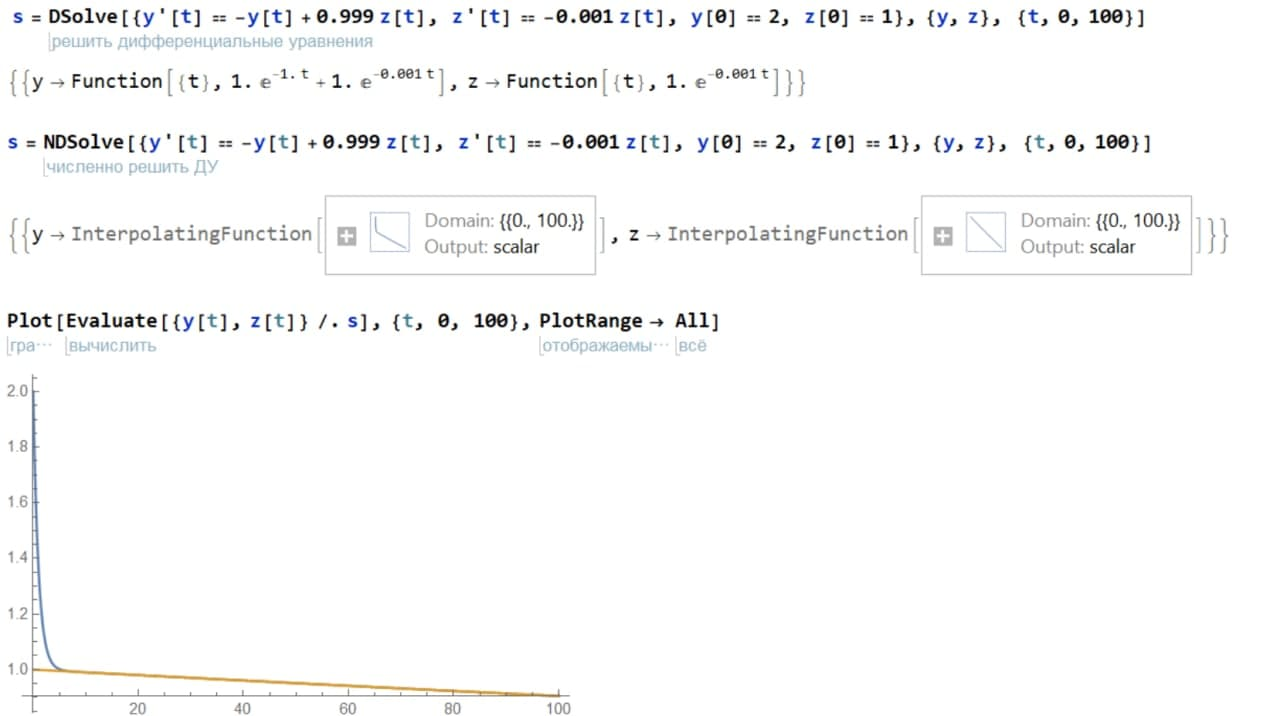

Запишем полученную систему:
$${\begin{equation*}
 \begin{cases}
   y(t)= e^{-t}+e^{-0.001t}\\
   z(t)= e^{-0.001t}\\
 \end{cases}
\end{equation*}}$$


Определим число жесткости:
$${A = \begin{bmatrix}
  -1 & 0.999\\
  0 & -0.001
\end{bmatrix}, det A = 0\\}$$
$${det A = \begin{bmatrix}
  -1-\lambda& 0.999\\
  0  &-0.001-\lambda 
\end{bmatrix} = 0 =>\begin{matrix}
 & \lambda _{1}= -0.0006\\
 & \lambda _{2}= 0
\end{matrix}}$$

$${k = \frac{\mid \lambda\mid _{max} }{\mid \lambda\mid _{min}} = \frac{1}{0.006} = 166.7}$$



In [1]:
import matplotlib.pyplot as plt
import numpy as np
from scipy import optimize
import math

In [2]:
t = list()
u = list()
time_sum = 100
y_0 = 2  #начальное Y(0)
z_0 = 1  #начальное Z(0)
u0 = [y_0, z_0]

In [11]:
def system_0(t, u):
    return list([-1 * u[0] + 0.999 * u[1], 0 * u[0] - 0.001 * u[1]])

def system_solve(t, i: int):
    return list([ math.exp(-t[i]) +  math.exp(-0.001 * t[i]), 0 * math.exp(-t[i]) + math.exp(- 0.001* t[i])])

def fun_analytical(tau, time_sum, u0=[y_0, z_0]) -> list and list:
    time_numbers = int(time_sum // tau)
    t = np.linspace(0, time_numbers * tau, time_numbers + 1)
    u = np.zeros((time_numbers + 1, len(u0)))
    for i in range(time_numbers + 1):
        u[i] = system_solve(t, i)
    return u, t

In [4]:
def draw_fun_analytical(t, u):
    u, t = fun_analytical(tau, time_sum, u0)
    fig = plt.figure()
    plt.title('Аналитическое решение')
    plt.ylabel('f(x)')
    plt.xlabel('t')
    l1 = plt.plot(t, u)
    fig.legend((l1), ('yz'))
    plt.grid(True)
    plt.show()

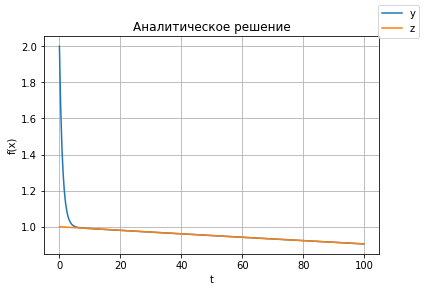

In [5]:
tau = 0.2
draw_fun_analytical(t, u)

# 2. Явный метод Эйлера.

Запишим задачу Коши в векторном виде:
$${\frac{d\vec{u}}{dt}=\vec{F}(t,\vec{u}), t>0\\\vec{u}(0)=\vec{u_{0}}}$$

Введём равномерную расчетную сетку: $${w_{\tau }= \left \{t_{n}=n\tau, n=0,1,..., N_{t}  \right \} => \vec{u}(t_{n})=\vec{F}(t_{n},\vec{u}(t_{n})), t_{n}\in w_{t} }$$\
Тогда: $${u'(t_{n})=lim\frac{\vec{u}(t_{n}+\tau)-\vec{u}(t_{n})}{\tau }}$$ используя малый шаг получим:
$${\tau u'(t_{n})\approx\frac{\vec{u}^{n+1}- \vec{u}^{n}}{\tau }}$$
Эта аппроксимация известна как разностная производная вперед с первым порядком точности. Исходя  из этой апроксимации получим формулу для явного метода Эйлера:
$${\frac{\vec{y}^{n+1}-\vec{y}^{n}}{\tau }=\vec{F}(t_{n},\vec{y}^{n})=>\vec{y}^{n+1}=\vec{y}^{n}+\tau \vec{F}(t_{n},\vec{y}^{n})}$$


In [8]:
def explicit_Euler_method(sustem_0, u0, tau, time_sum):
    time_numbers = int(time_sum // tau)
    t = np.linspace(0, time_numbers * tau, time_numbers + 1)
    u = np.zeros((time_numbers + 1, len(u0)))
    u[0] = u0
    for i in range(time_numbers):
        du_ = np.asarray(system_0(t[i], u[i]))
        u[i + 1] = u[i] + tau * du_
    return list(u), list(t)

In [9]:
def draw_explicit_Euler_method(t, u):
    u, t = explicit_Euler_method(system_0, u0, tau, time_sum)
    u_0, t_0 = fun_analytical(tau, time_sum, u0)
    fg = plt.figure(figsize=(11, 6), constrained_layout=True)
    gs = fg.add_gridspec(2, 2)
    fig_ax_1 = fg.add_subplot(gs[0, :])
    plt.title('Погрешность')
    plt.grid(True)
    plt.plot(t, u_0-u)
    fig_ax_2 = fg.add_subplot(gs[1, 0])
    plt.title('Явный метод Эйлера')
    plt.grid(True)
    plt.plot(t, u)
    fig_ax_3 = fg.add_subplot(gs[1, 1])
    plt.title('Аналитическое решение')
    plt.grid(True)
    plt.plot(t_0, u_0) 

Важно! В данном и всех дальнейших случаях график аналитического решения стоится с точно таким же шагом, как и результат самого метода. А под погрешностью понимается разность между значениями эти двумя значениями в получившихся точках.

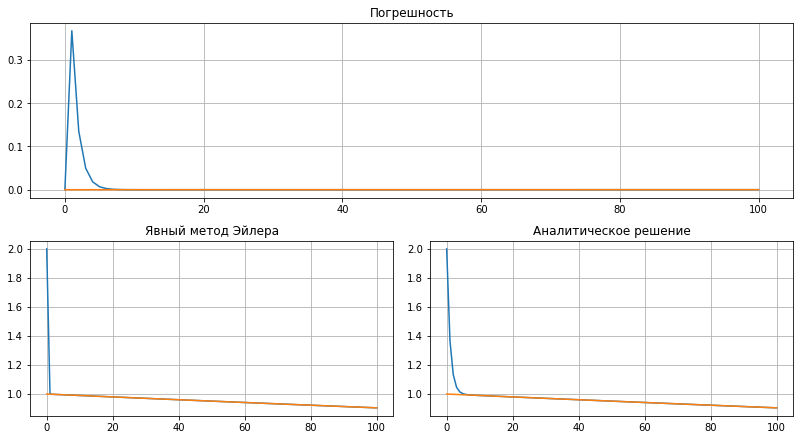

In [12]:
tau = 1
draw_explicit_Euler_method(t, u)

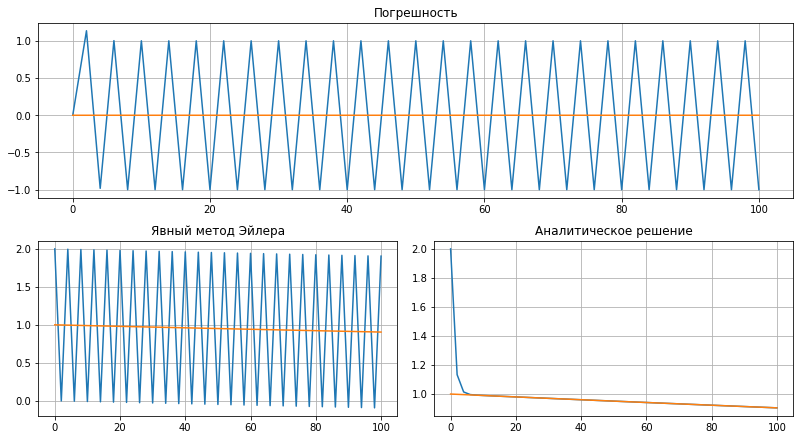

In [13]:
tau = 2
draw_explicit_Euler_method(t, u)

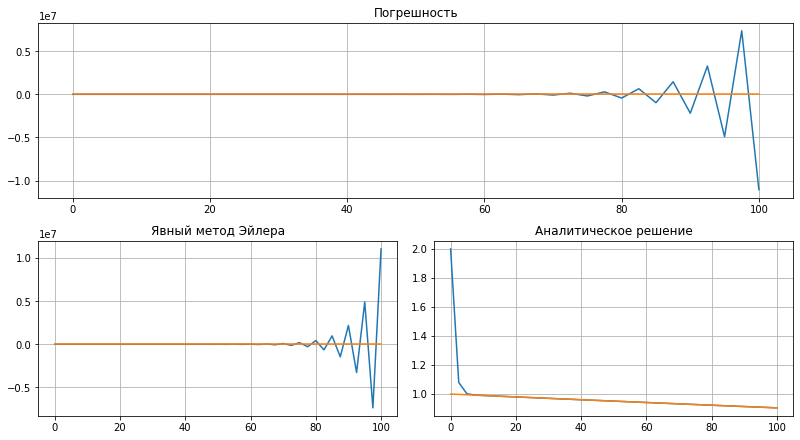

In [14]:
tau = 2.5
draw_explicit_Euler_method(t, u)

# 3. Неявный метод Эйлера.

Особенность неявного метода Эйлера заключается в том, что значение функции ${F}$ берется на новом временном слое:
$${\frac{\vec{y}^{n+1}-\vec{y}^{n}}{\tau }=\vec{F}(t_{n+1},\vec{y}^{n+1})}$$
Таким образом для нахождения приближенного значения искомой функции на новом временном слое ${t_{n+1}}$ нужно решить нелинейное уравнение относительно ${\vec{y}^{n+1}}$:
$${\vec{y}^{n+1} -\tau \vec{F}(t_{n+1},\vec{y}^{n+1})-\vec{y}^{n} =0}$$



In [15]:
def implicit_Euler_method(system_0, u0, tau, time_sum):
    time_numbers = int(time_sum // tau)
    du_ = lambda t, u: np.asarray(system_0(t, u))
    t = np.linspace(0, time_numbers * tau, time_numbers + 1)
    u = np.zeros((time_numbers + 1, len(u0)))
    u[0] = u0
    def func(a, t, b):
        return a - tau * du_(t, a) - b
    for i in range(time_numbers):
        u[i + 1] = optimize.fsolve(func, u[i], (t[i + 1], u[i]))
    return list(u), list(t)

In [16]:
def draw_implicit_Euler_method(t, u):
    u, t = implicit_Euler_method(system_0, u0, tau, time_sum)
    u_0, t_0 = fun_analytical(tau, time_sum, u0)
    fg = plt.figure(figsize=(11, 6), constrained_layout=True)
    gs = fg.add_gridspec(2, 2)
    fig_ax_1 = fg.add_subplot(gs[0, :])
    plt.title('Погрешность')
    plt.grid(True)
    plt.plot(t, u_0-u)
    fig_ax_2 = fg.add_subplot(gs[1, 0])
    plt.title('Неявный метод Эйлера')
    plt.grid(True)
    plt.plot(t, u)
    fig_ax_3 = fg.add_subplot(gs[1, 1])
    plt.title('Аналитическое решение')
    plt.grid(True)
    plt.plot(t_0, u_0)

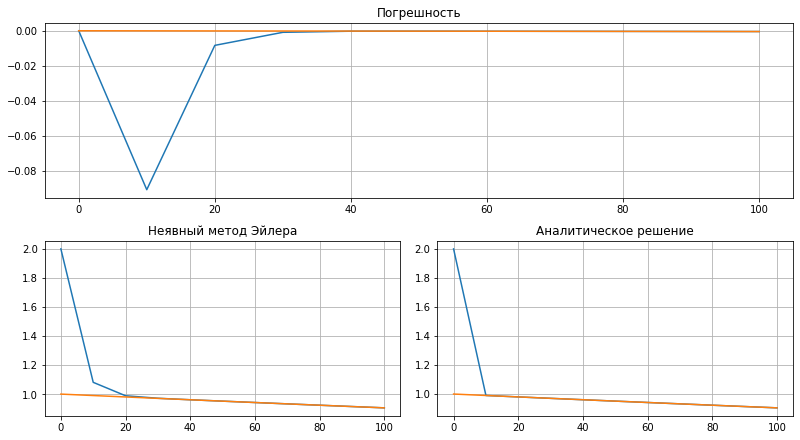

In [17]:
tau = 10
draw_implicit_Euler_method(t, u)

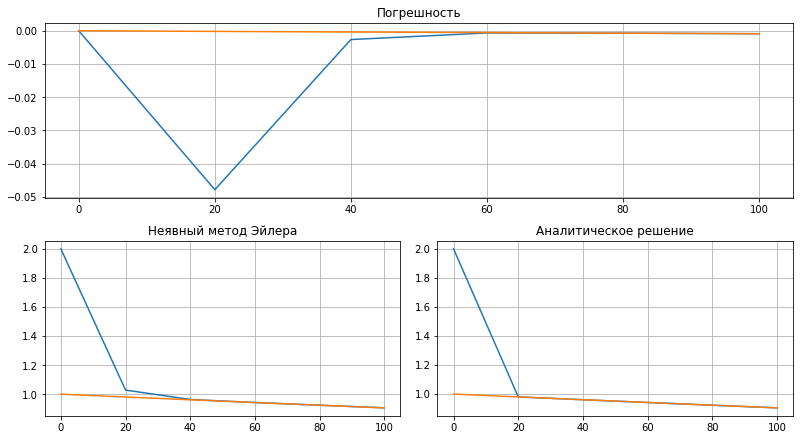

In [18]:
tau = 20
draw_implicit_Euler_method(t, u)

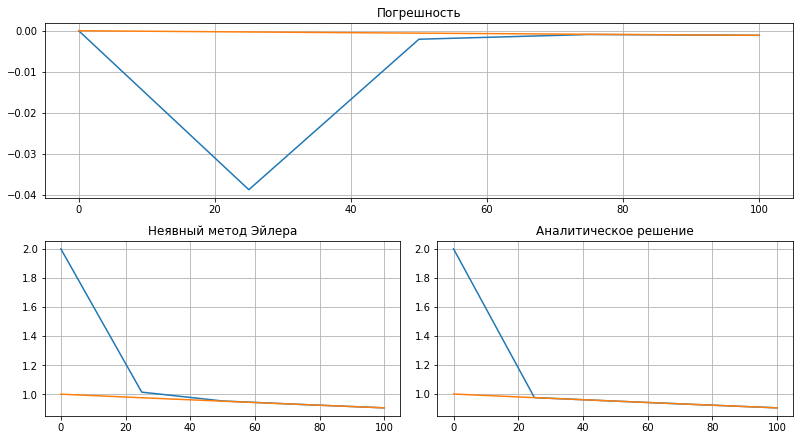

In [19]:
tau = 25
draw_implicit_Euler_method(t, u)

# 4. Усовершенствованный метод Эйлера второго порядка.

Рассмотрим участок между точками $[t_{n - 1}, t_{n + 1}]$ центром в которого является точка $t_{n}$,тогда:
$$y^{n+1} = y^{n} + \tau F(t_{n}, y^{n}) \;-> y^{n+1} = y^{n - 1} + 2\tau F(t_{n}, y^{n})$$

Данная формула применима только для $n \geqslant 1$, следовательно, значени $y^{1}$ по ней получить нельзя, поэтому $y^{n}$ находят по методу Эйлера, при этом для получения более точного результата поступают так: сразу по формуле явного метода Эйлера находят значение:$$y^{\frac{1}{2}} = y^{0} + \frac{\tau}{2}F(t_{0}, y^{0})$$

В точке $t_{\frac{1}{2}} = t_{0} + \frac{\tau}{2}$, а затем находится $y^{1}$ по формуле $y^{n+1} = y^{n - 1} + 2\tau F(t_{n}, y^{n})$ с шагом $\frac{\tau}{2}$:$$y^{1} = y^{0} + \tau F(t_{\frac{1}{2}}, y^{\frac{1}{2}})$$

После того как $y^{1}$ найдено дальнейшие вычисления при $n = 1,2,3,...N$ производится по формуле$$y^{n+1} = y^{n - 1} + 2\tau F(t_{n}, y^{n})$$


In [20]:
def improved_Euler_method(system_0, u0, tau, time_sum):
    time_numbers = int(time_sum // tau)
    du_ = lambda t, u: np.asarray(system_0(t, u))
    t = np.linspace(0, time_numbers * tau, time_numbers + 1)
    u = np.zeros((time_numbers + 1, len(u0)))
    u[0] = u0
    for i in range(0, time_numbers):
        t_ = t[i] + tau / 2
        u_ = u[i] + tau / 2 * du_(t[i], u[i])
        u[i + 1] = u[i] + tau * du_(t_, u_)
    return list(u), list(t)

In [22]:
def draw_improved_Euler_method(t, u):
    u, t = improved_Euler_method(system_0, u0, tau, time_sum)
    u_0, t_0 = fun_analytical(tau, time_sum, u0)
    fg = plt.figure(figsize=(11, 6), constrained_layout=True)
    gs = fg.add_gridspec(2, 2)
    fig_ax_1 = fg.add_subplot(gs[0, :])
    plt.title('Погрешность')
    plt.grid(True)
    plt.plot(t, u_0-u)
    fig_ax_2 = fg.add_subplot(gs[1, 0])
    plt.title('Усовершенствованный метод Эйлера')
    plt.grid(True)
    plt.plot(t, u)
    fig_ax_3 = fg.add_subplot(gs[1, 1])
    plt.title('Аналитическое решение')
    plt.grid(True)
    plt.plot(t_0, u_0)

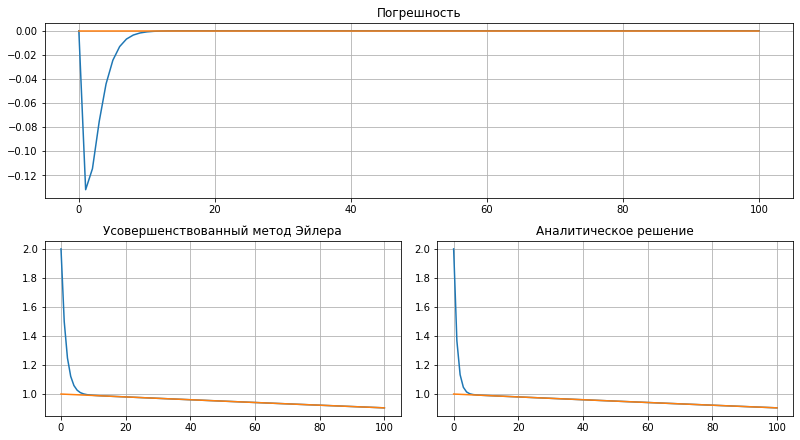

In [23]:
tau = 1
draw_improved_Euler_method(t, u)

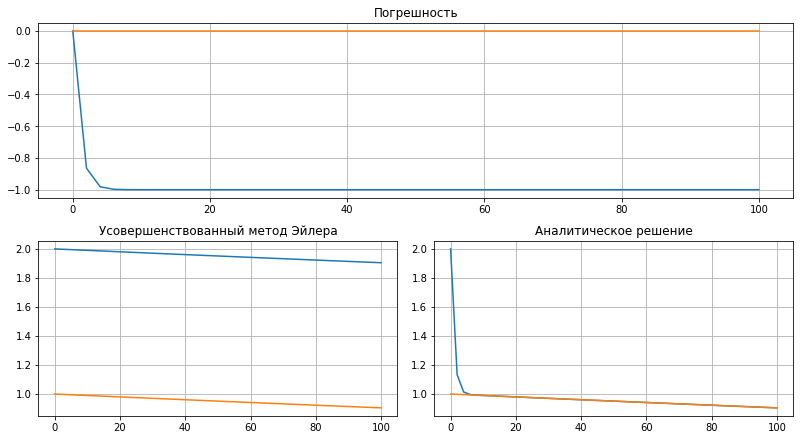

In [24]:
tau = 2
draw_improved_Euler_method(t, u)

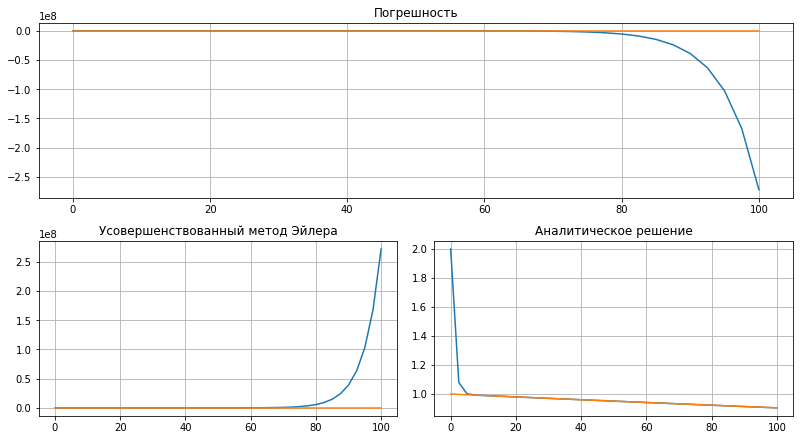

In [25]:
tau = 2.5
draw_improved_Euler_method(t, u)

# 5. Методы Гира.

Для нахождения неизвестных значений $y^{0}, y^{1}, y^{2}, y^{3}$ необходимо использовать какой-либо иной метод, например метод Рунге-Кутта.

$${
\begin{matrix}
 Порядок\:метода& Формула\\ 
 1& y^{n}-y^{n-1}=\tau F(t_{n},y^{n})\\ 
 2& 3y^{n}-4y^{n-1}+y^{n-2}=2\tau F(t_{n},y^{n})\\ 
 3& 11y^{n}-18y^{n-1}+9y^{n-2}-2y^{n-3}=6\tau F(t_{n},y^{n})\\ 
 4& 25y^{n}-48y^{n-1}+36y^{n-2}-16y^{n-3}+y^{n-4}=12\tau F(t_{n},y^{n})
\end{matrix}}$$


# 5.1 Метод Гира 1-го порядка

Исходя из формул, можно заметить, что неявный метод Эйлера это и есть метод Гира первого порядка.




In [26]:
def Gears_first_order_method(system_0, u0, tau, time_sum):
    time_numbers = int(time_sum // tau)
    du_ = lambda t, u: np.asarray(system_0(t, u))
    t = np.linspace(0, time_numbers * tau, time_numbers + 1)
    u = np.zeros((time_numbers + 1, len(u0)))
    u[0] = u0
    def func(a, t, b):
        return a - tau * du_(t, a) - b
    for i in range(time_numbers):
        u[i + 1] = optimize.fsolve(func, u[i], (t[i + 1], u[i]))
    return list(u), list(t)

In [27]:
def draw_Gears_first_order_method(t, u):
    u, t = Gears_first_order_method(system_0, u0, tau, time_sum)
    u_0, t_0 = fun_analytical(tau, time_sum, u0)
    fg = plt.figure(figsize=(11, 6), constrained_layout=True)
    gs = fg.add_gridspec(2, 2)
    fig_ax_1 = fg.add_subplot(gs[0, :])
    plt.title('Погрешность')
    plt.grid(True)
    plt.plot(t, u_0-u)
    fig_ax_2 = fg.add_subplot(gs[1, 0])
    plt.title('Метод Гира 1-го порядка')
    plt.grid(True)
    plt.plot(t, u)
    fig_ax_3 = fg.add_subplot(gs[1, 1])
    plt.title('Аналитическое решение')
    plt.grid(True)
    plt.plot(t_0, u_0)

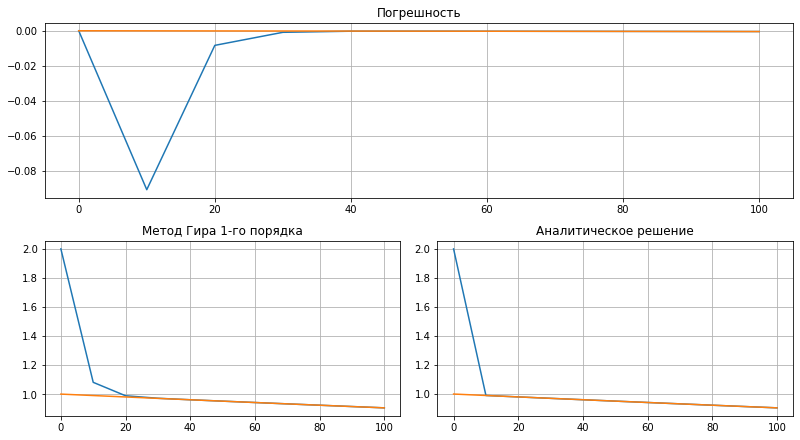

In [28]:
tau = 10
draw_Gears_first_order_method(t, u)

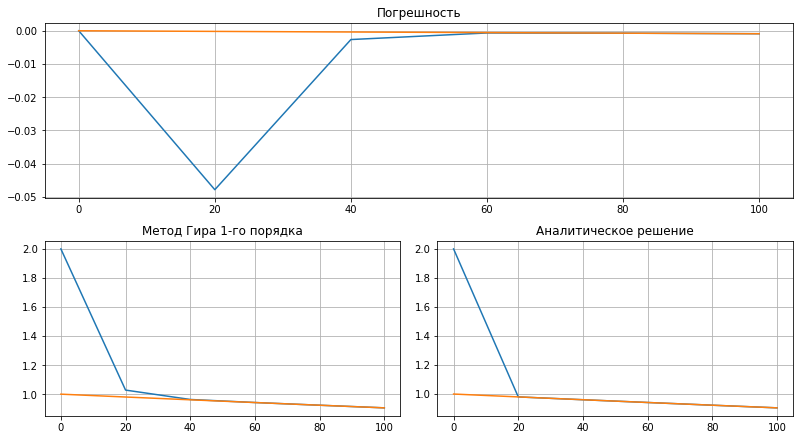

In [29]:
tau = 20
draw_Gears_first_order_method(t, u)

# 5.2 Метод Гира 2-го порядка

In [30]:
def Gears_second_order_method(system_0, u0, tau, time_sum):
    time_numbers = int(time_sum // tau)
    du_ = lambda t, u: np.asarray(system_0(t, u))
    t = np.linspace(0, time_numbers * tau, time_numbers + 1)
    u = np.zeros((time_numbers + 1, len(u0)))
    u[0] = u0
    for i in range(2 - 1):
      k1 = du_(t[i], u[i])
      k2 = du_(t[i] + tau / 2, u[i] + tau * k1  / 2)
      k3 = du_(t[i] + tau / 2, u[i] + tau * k2  / 2)
      k4 = du_(t[i] + tau, u[i] + tau * k3)
      u[i + 1] = u[i] + tau * (k1 + 2 * k2 + 2 * k3 + k4) / 6
    def func(a, t, b, c):
        return 3 * a - 4 * b + c - 2 * tau * du_(t, a)
    for i in range(time_numbers - 1):
        u[i + 2] = optimize.fsolve(func, u[i], (t[i + 2], u[i + 1], u[i]))
    return list(u), list(t)

In [31]:
def draw_Gears_second_order_method(t, u):
    u, t = Gears_second_order_method(system_0, u0, tau, time_sum)
    u_0, t_0 = fun_analytical(tau, time_sum, u0)
    fg = plt.figure(figsize=(11, 6), constrained_layout=True)
    gs = fg.add_gridspec(2, 2)
    fig_ax_1 = fg.add_subplot(gs[0, :])
    plt.title('Погрешность')
    plt.grid(True)
    plt.plot(t, u_0-u)
    fig_ax_2 = fg.add_subplot(gs[1, 0])
    plt.title('Метод Гира 2-го порядка')
    plt.grid(True)
    plt.plot(t, u)
    fig_ax_3 = fg.add_subplot(gs[1, 1])
    plt.title('Аналитическое решение')
    plt.grid(True)
    plt.plot(t_0, u_0)

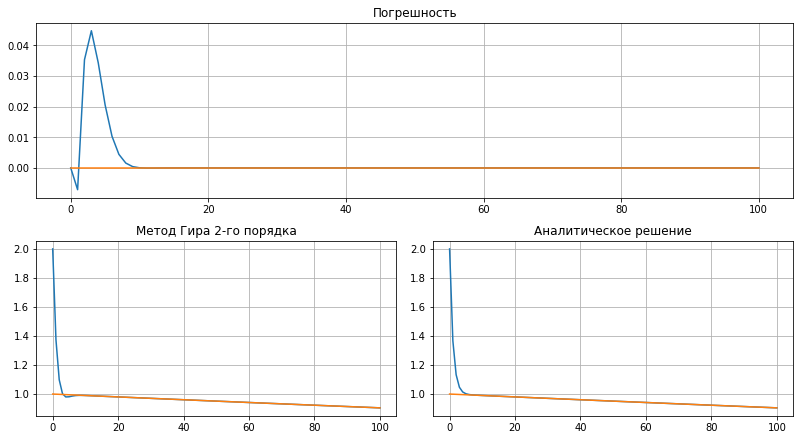

In [32]:
tau = 1
draw_Gears_second_order_method(t, u)

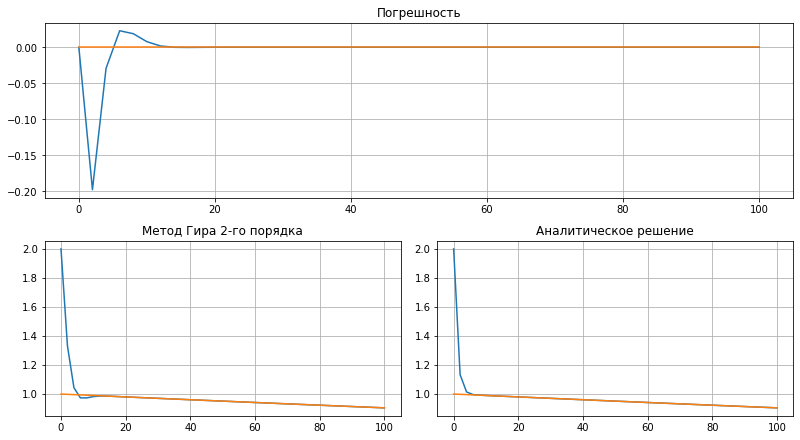

In [33]:
tau = 2
draw_Gears_second_order_method(t, u)

#5.3 Метод Гира 4-го порядка

In [34]:
def Gears_fourth_order_method(system_0, u0, tau, time_sum):
  time_numbers = int(time_sum // tau)
  du_ = lambda t, u: np.asarray(system_0(t, u))
  t = np.linspace(0, time_numbers * tau, time_numbers + 1)
  u = np.zeros((time_numbers + 1, len(u0)))
  u[0] = u0
  for i in range(4 - 1):
    k1 = du_(t[i], u[i])
    k2 = du_(t[i] + tau / 2, u[i] + tau * k1 / 2)
    k3 = du_(t[i] + tau / 2, u[i] + tau * k2 / 2)
    k4 = du_(t[i] + tau, u[i] + tau * k3)
    u[i + 1] = u[i] + tau * (k1 + 2 * k2 + 2 * k3 + k4) / 6
  def func(a, t, b, c, d, e):
      return 25 * a - 48 * b + 36 * c - 16 * d + 3*e - 12 * tau * du_(t, a)
  for i in range(time_numbers - 3):
    u[i + 4] = optimize.fsolve(func, u[i], (t[i + 4], u[i + 3], u[i + 2], u[i + 1], u[i]))
  return list(u), list(t)

In [36]:
def draw_Gears_fourth_order_method(t, u):
  u, t = Gears_fourth_order_method(system_0, u0, tau, time_sum)
  u_0, t_0 = fun_analytical(tau, time_sum, u0)
  fg = plt.figure(figsize=(11, 6), constrained_layout=True)
  gs = fg.add_gridspec(2, 2)
  fig_ax_1 = fg.add_subplot(gs[0, :])
  plt.title('Погрешность')
  plt.grid(True)
  plt.plot(t, u_0-u)
  fig_ax_2 = fg.add_subplot(gs[1, 0])
  plt.title('Метод Гира 4-го порядка')
  plt.grid(True)
  plt.plot(t, u)
  fig_ax_3 = fg.add_subplot(gs[1, 1])
  plt.title('Аналитическое решение')
  plt.grid(True)
  plt.plot(t_0, u_0)

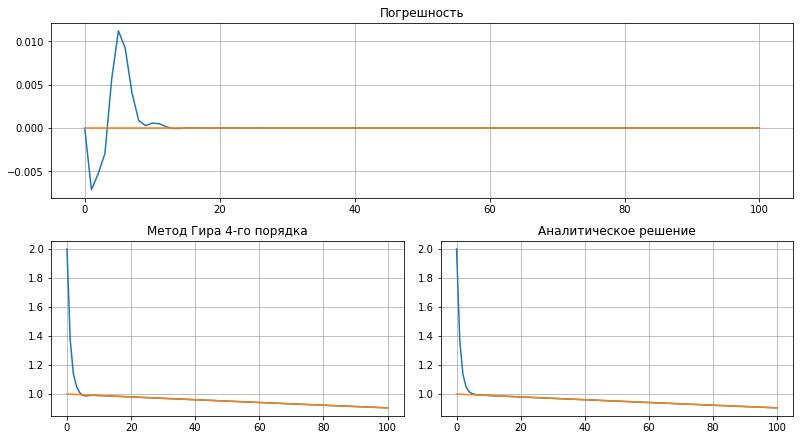

In [37]:
tau = 1
draw_Gears_fourth_order_method(t, u)